In [2]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### EDA for friday of our simulation

In [3]:
friday_simulation = pd.read_csv('friday.csv', sep=';')
friday_simulation

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks
...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy
5121,2019-09-06 21:50:00,1507,checkout
5122,2019-09-06 21:50:00,1508,checkout
5123,2019-09-06 21:50:00,1509,drinks


In [4]:
friday_simulation["timestamp"] = pd.to_datetime(friday_simulation["timestamp"])
friday_simulation

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks
...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy
5121,2019-09-06 21:50:00,1507,checkout
5122,2019-09-06 21:50:00,1508,checkout
5123,2019-09-06 21:50:00,1509,drinks


In [5]:
# Calculate the total number of customers per location
total_customers_per_location = friday_simulation.groupby('location')[['customer_no']].count().sort_values('customer_no', ascending=True)
total_customers_per_location

,customer_no
location,
spices,790
drinks,844
dairy,932
fruit,1057
checkout,1502


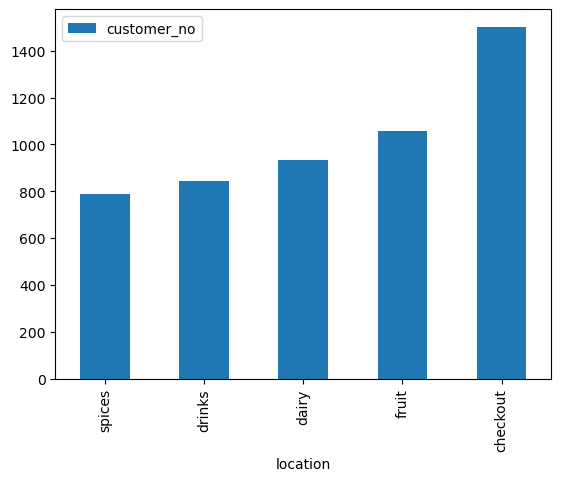

In [6]:
# Plot total customers per location
total_customers_per_location.plot.bar();

In [7]:
# Calculate the total number of customers per location over time
total_customers_per_location_over_time = friday_simulation.groupby(['timestamp', 'location']).count()
total_customers_per_location_over_time

customer_no
timestamp           location             
2019-09-06 07:00:00 dairy               1
                    drinks              1
                    fruit               1
2019-09-06 07:01:00 checkout            1
                    dairy               1
...                                   ...
2019-09-06 21:50:00 checkout            2
                    dairy               1
                    drinks              1
                    fruit               1
                    spices              1

[2825 rows x 1 columns]

In [8]:
# Resample the time by hour
total_customers_per_location_over_time = friday_simulation.copy()

In [9]:
total_customers_per_location_over_time['hour'] = total_customers_per_location_over_time['timestamp'].dt.hour

In [10]:
total_customers_per_location_over_time

,timestamp,customer_no,location,hour
0,2019-09-06 07:00:00,1,dairy,7
1,2019-09-06 07:00:00,2,drinks,7
2,2019-09-06 07:00:00,3,fruit,7
3,2019-09-06 07:01:00,2,checkout,7
4,2019-09-06 07:01:00,4,drinks,7
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,21
5121,2019-09-06 21:50:00,1507,checkout,21
5122,2019-09-06 21:50:00,1508,checkout,21
5123,2019-09-06 21:50:00,1509,drinks,21


Plot the peak hours as single graphs

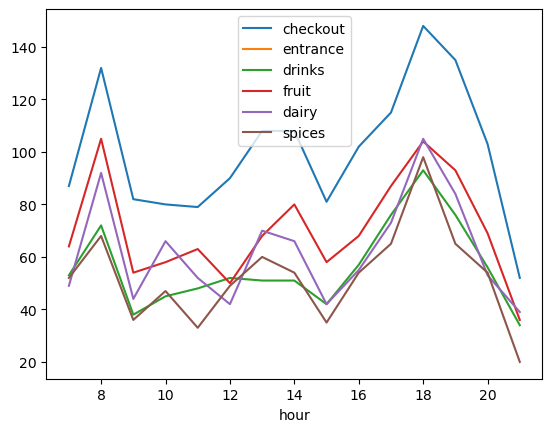

In [11]:
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'checkout'].groupby(['hour']).count().rename({'timestamp':'checkout'},axis=1)['checkout'].plot(legend=True)
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'entrance'].groupby(['hour']).count().rename({'timestamp':'entrance'},axis=1)['entrance'].plot(legend=True)
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'drinks'].groupby(['hour']).count().rename({'timestamp':'drinks'},axis=1)['drinks'].plot(legend=True)
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'fruit'].groupby(['hour']).count().rename({'timestamp':'fruit'},axis=1)['fruit'].plot(legend=True)
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'dairy'].groupby(['hour']).count().rename({'timestamp':'dairy'},axis=1)['dairy'].plot(legend=True)
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'spices'].groupby(['hour']).count().rename({'timestamp':'spices'},axis=1)['spices'].plot(legend=True);

Plot the peak hours as a heatmap

<AxesSubplot: xlabel='location', ylabel='hour'>

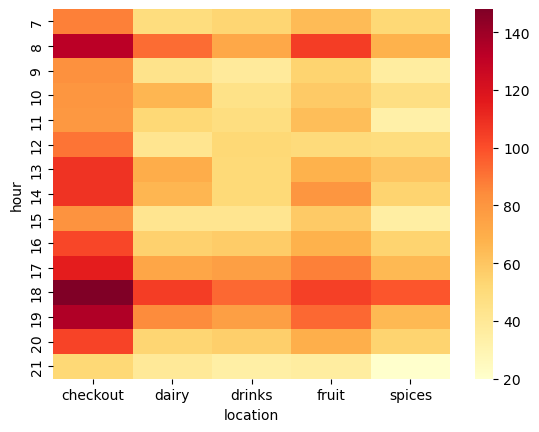

In [12]:
# Pivot the data into a table with hours as rows and locations as columns
pivot_table = total_customers_per_location_over_time.pivot_table(
    index='hour', columns='location', values='timestamp', aggfunc='count')

# Plot the heatmap
sns.heatmap(pivot_table, cmap='YlOrRd')

Plot the peak hours as a heatmap (y-axes: The other way around)

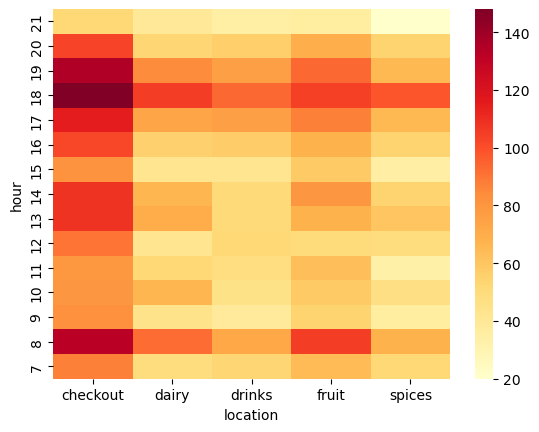

In [13]:
# Pivot the data into a table with hours as rows and locations as columns
pivot_table = total_customers_per_location_over_time.pivot_table(
    index='hour', columns='location', values='timestamp', aggfunc='count')

# Plot the heatmap
ax= sns.heatmap(pivot_table, cmap='YlOrRd')
ax.invert_yaxis()

Consider only checkout frequency

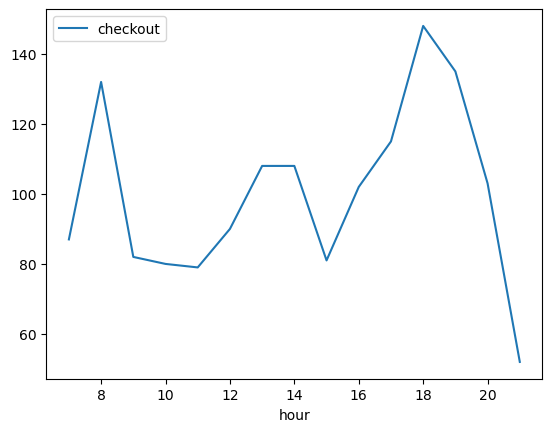

In [14]:
total_customers_per_location_over_time[total_customers_per_location_over_time['location'] == 'checkout'].groupby(['hour']).count().rename({'timestamp':'checkout'},axis=1)['checkout'].plot(legend=True);

Plot the time each customer spent in the whole supermarket

In [16]:
# Calculate the time each customer spent in the market
time_spent = friday_simulation.groupby(by=['customer_no'])[['timestamp']].apply(lambda x:x.max() - x.min()).rename({'timestamp':'time_spent'}, axis=1) / pd.Timedelta(minutes=1)
time_spent

,time_spent
customer_no,
1,5.0
2,1.0
3,11.0
4,1.0
5,14.0
...,...
1506,0.0
1507,2.0
1508,2.0


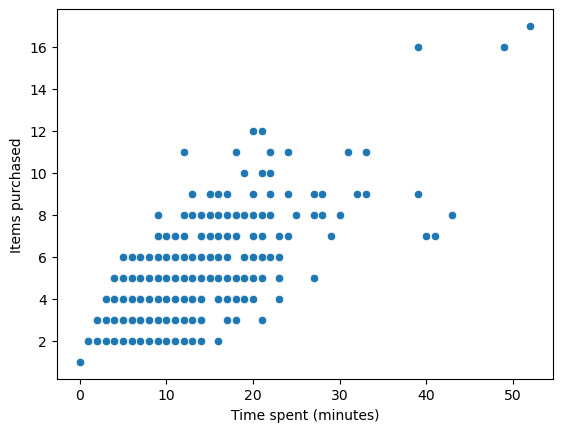

In [17]:
items_purchased = friday_simulation.groupby(by=['customer_no'])[['timestamp']].count().rename({'timestamp':'items_purchased'}, axis=1)
merged_data = pd.merge(time_spent, items_purchased, on='customer_no')

sns.scatterplot(x='time_spent', y='items_purchased', data=merged_data)
plt.xlabel('Time spent (minutes)')
plt.ylabel('Items purchased')
plt.show()

Calculate the time each customer spent in specific locations of the supermarket

In [18]:
 # Extend the dataset to get minute-based datapoints of every customer
def to_minute(df):
    """Function to resample customer data to minute steps, forward interpolating the
    location value."""
    grouper = df.set_index('timestamp').groupby('customer_no').resample('min')['location'].ffill()
    resampled_df = grouper.reset_index('timestamp')
    return resampled_df.reset_index()

In [19]:
to_minute(friday_simulation)

,customer_no,timestamp,location
0,1,2019-09-06 07:00:00,dairy
1,1,2019-09-06 07:01:00,dairy
2,1,2019-09-06 07:02:00,dairy
3,1,2019-09-06 07:03:00,dairy
4,1,2019-09-06 07:04:00,spices
...,...,...,...
11063,1508,2019-09-06 21:48:00,dairy
11064,1508,2019-09-06 21:49:00,dairy
11065,1508,2019-09-06 21:50:00,checkout
11066,1509,2019-09-06 21:50:00,drinks
